In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import utils

%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X, Y, test_X, test_Y, classes = utils.load_dataset()
print('X.shape: {}, Y.shape: {}, test_X.shape: {}, test_Y.shape: {}'.format(X.shape, Y.shape, test_X.shape, test_Y.shape))
print('classes: {}'.format(classes))

X.shape: (209, 64, 64, 3), Y.shape: (209, 1), test_X.shape: (50, 64, 64, 3), test_Y.shape: (50, 1)
classes: [b'non-cat' b'cat']


y=1, it's a cat


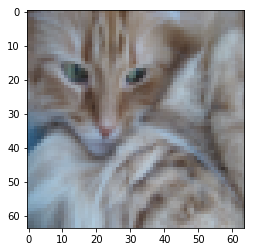

In [4]:
idx = 2

x, y = X[idx], Y[idx][0]
cls = classes[y].decode('UTF-8')

plt.imshow(X[idx])
print('y={}, it\'s a {}'.format(y, cls))

In [5]:
X = X.reshape(X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
print('X.shape: {}, Y.shape: {}, test_X.shape: {}, test_Y.shape: {}'.format(X.shape, Y.shape, test_X.shape, test_Y.shape))

X.shape: (209, 12288), Y.shape: (209, 1), test_X.shape: (50, 12288), test_Y.shape: (50, 1)


<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**算法的数学表达式**:

对于某一张图片 $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

总损失为所有的图片数据的损失之和：
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$

w和b的梯度为：
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A - Y)^T \tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i=1}^m(a^{(i)} - y^{(i)}) \tag{6}$$

In [13]:
def propagate(w, b, X, Y):
  m = Y.shape[0]
  sigmoid = lambda z: 1 / (1 + np.exp(-z))
  A = sigmoid(np.dot(X, w) + b)
  cost = (1. / m) * np.sum(- np.multiply(Y, np.log(A)) - np.multiply((1. - Y), np.log(1. - A)))
  
  dw = 1. / m * np.dot((A - Y).T, X).T
  db = 1. / m * np.sum(A - Y)
  return A, cost, (dw, db)

def model(X, Y, test_X, test_Y):
  w = np.zeros((X.shape[1], 1))
  b = 0
  
  X = X / 255.0
  test_X = test_X / 255.0

  num_iterations = 1000
  learning_rate = 0.005
  
  for i in range(num_iterations):
    A, cost, (dw, db) = propagate(w, b, X, Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    if (i + 1) % 100 == 0:
      print('cost after iteration {}: {}'.format((i + 1), cost))

      Y_predict = A > 0.5
      accuracy = np.sum(Y_predict == Y) / float(Y.shape[0])
      print('train accuracy after iteration {}: {:.2f}%'.format((i + 1), accuracy * 100))
      
      test_A, _, _ = propagate(w, b, test_X, test_Y)
      test_Y_predict = test_A > 0.5
      test_accuracy = np.sum(test_Y_predict == test_Y) / float(test_Y.shape[0])
      print('test accuracy after iteration {}: {:.2f}%\n'.format((i + 1), test_accuracy * 100))


model(X, Y, test_X, test_Y)

cost after iteration 100: 0.64489788295317
train accuracy after iteration 100: 66.51%
test accuracy after iteration 100: 84.00%

cost after iteration 200: 0.48489361414848486
train accuracy after iteration 200: 73.21%
test accuracy after iteration 200: 80.00%

cost after iteration 300: 0.37776149521638075
train accuracy after iteration 300: 84.69%
test accuracy after iteration 300: 72.00%

cost after iteration 400: 0.3317754055523586
train accuracy after iteration 400: 91.39%
test accuracy after iteration 400: 68.00%

cost after iteration 500: 0.30352867202605527
train accuracy after iteration 500: 92.34%
test accuracy after iteration 500: 74.00%

cost after iteration 600: 0.280094277579675
train accuracy after iteration 600: 93.78%
test accuracy after iteration 600: 74.00%

cost after iteration 700: 0.2602258475628189
train accuracy after iteration 700: 95.22%
test accuracy after iteration 700: 74.00%

cost after iteration 800: 0.24310018399838854
train accuracy after iteration 800: 9